# ProfilesWithTies

Code for generating profile in which voters submit strict weak orders. 

In [14]:
# import the Profile class

from voting.profiles import Profile
from voting.profiles_with_ties import *
import signal

# import the voting methods

from voting.voting_methods import *

import math
import random
import pandas as pd
from itertools import product, combinations

from functools import partial
from multiprocess import Pool, cpu_count
import pickle
import timeit


import copy
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set()



+-------+-----+---+-----+-------+-----+-----+-----+
|   1   |  2  | 1 |  4  |   1   |  2  |  1  |  1  |
+-------+-----+---+-----+-------+-----+-----+-----+
| a b c |  a  | a | a b | a b c | a b | a c | c b |
|       | b c | b |  c  |       |  c  |  b  |  a  |
|       |     | c |     |       |     |     |     |
+-------+-----+---+-----+-------+-----+-----+-----+



(abc) 1
a(bc) 2
abc 1
(ab)c 4
(abc) 1
(ab)c 2
(ac)b 1
(cb)a 1


support(a, b) = 4
support(a, a) = 0
support(b, a) = 1
support(a, c) = 9
support(c, a) = 1
support(b, c) = 7
support(c, b) = 1


margin(a, b) = 3
margin(a, a) = 0
margin(b, a) = -3
margin(a, c) = 8
margin(c, a) = -8
margin(b, c) = 6
margin(c, b) = -6


ratio(a, b) = 4.0
ratio(a, a) = 1
ratio(b, a) = 0.25
ratio(a, c) = 9.0
ratio(c, a) = 0.1111111111111111
ratio(b, c) = 7.0
ratio(c, b) = 0.14285714285714285


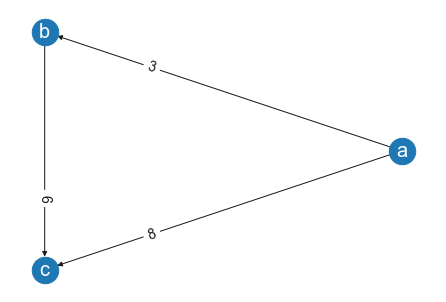

+-----+---+---+---+-----+---+-----+---+
|  1  | 2 | 1 | 4 |  1  | 2 |  1  | 1 |
+-----+---+---+---+-----+---+-----+---+
| a c | a | a | a | a c | a | a c | c |
|     | c |   | c |     | c |     | a |
+-----+---+---+---+-----+---+-----+---+
{'a': 1, 'c': 1}
{'a': 1, 'c': 2}
{'a': 1, 'c': 3}
{'a': 1, 'c': 2}
{'a': 1, 'c': 1}
{'a': 1, 'c': 2}
{'a': 1, 'c': 1}
{'c': 1, 'a': 2}


In [15]:

a="a"
b="b"
c="c"

cmap = {
    a:"a", 
    b:"b", 
    c:"c"
}


rankings = [
    {a:1, b:1, c:1},
    {a:1, b:2, c:2},
    {a:1, b:2, c:3},
    {a:1, b:1, c:2},
    {a:1, b:1, c:1},
    {a:1, b:1, c:2},
    {a:1, c:1, b:2},
    {c:1, b:1, a:2}
]
rcounts = [1, 2, 1, 4, 1, 2, 1, 1]
num_cands = 3
prof = ProfileWithTies(rankings, num_cands, rcounts=rcounts)


prof.display()


print("\n\n")
for r,n in zip(prof.rankings,rcounts):
    print(r, n)

print("\n")
print(f"support(a, b) = {prof.support(a, b)}")
print(f"support(a, a) = {prof.support(a, a)}")
print(f"support(b, a) = {prof.support(b, a)}")
print(f"support(a, c) = {prof.support(a, c)}")
print(f"support(c, a) = {prof.support(c, a)}")
print(f"support(b, c) = {prof.support(b, c)}")
print(f"support(c, b) = {prof.support(c, b)}")

print("\n")
print(f"margin(a, b) = {prof.margin(a, b)}")
print(f"margin(a, a) = {prof.margin(a, a)}")
print(f"margin(b, a) = {prof.margin(b, a)}")
print(f"margin(a, c) = {prof.margin(a, c)}")
print(f"margin(c, a) = {prof.margin(c, a)}")
print(f"margin(b, c) = {prof.margin(b, c)}")
print(f"margin(c, b) = {prof.margin(c, b)}")


print("\n")
print(f"ratio(a, b) = {prof.ratio(a, b)}")
print(f"ratio(a, a) = {prof.ratio(a, a)}")
print(f"ratio(b, a) = {prof.ratio(b, a)}")
print(f"ratio(a, c) = {prof.ratio(a, c)}")
print(f"ratio(c, a) = {prof.ratio(c, a)}")
print(f"ratio(b, c) = {prof.ratio(b, c)}")
print(f"ratio(c, b) = {prof.ratio(c, b)}")

prof.display_margin_graph()


prof_minus, _ = prof.remove_candidates([b])

prof_minus.display()

for r in prof_minus.rankings: 
    print(r.rmap)